## SETUP

In [ ]:
import os
import shutil   
import zipfile
import random
import pathlib
import glob
import pickle
import PIL
from PIL import Image
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## GET AND ORGANIZE DATA

In [ ]:
!unzip -q '/content/gdrive/MyDrive/Colab Notebooks/WP9_Face_Detection/UPDATE_CROP_DATASET.zip' -d '/content'

In [ ]:
data_dir = pathlib.Path('/content/UPDATE_CROP_DATASET')

image_count = len(list(data_dir.glob('*/*')))
print(image_count)

2404


### Load pretrained model

In [ ]:
model = keras.models.load_model(SAVED_MODEL)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [ ]:
model_file_path = Path(RESULT, 'model_resnet50v2_checkpoint.h5')

In [ ]:
model.load_weights(model_file_path)

### Explore data

Now let's take a look at a few pictures to get a better sense of what the datasets look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 5

pic_index = 0 # Index for iterating over images

In [ ]:
# Creating directory path for train folder of each class

dong_dir = '/content/UPDATE_CROP_DATASET/Dong'
hiep_dir = '/content/UPDATE_CROP_DATASET/Hiep'
lili_dir = '/content/UPDATE_CROP_DATASET/Lili'
thao_dir = '/content/UPDATE_CROP_DATASET/Thao'
vy_dir = '/content/UPDATE_CROP_DATASET/Vy'
all_dir = [dong_dir, vy_dir, thao_dir, lili_dir, hiep_dir]

In [ ]:
# Creating directory list of images from train folder of each class
dong_fnames = os.listdir(dong_dir)
vy_fnames = os.listdir(vy_dir)
thao_fnames = os.listdir(thao_dir)
lili_fnames = os.listdir(lili_dir)
hiep_fnames = os.listdir(hiep_dir)
all_fnames = [dong_fnames,vy_fnames,thao_fnames,lili_fnames,hiep_fnames]

In [ ]:
for dir in all_dir:
    path_dir = pathlib.Path(dir)
    image_count = len(list(path_dir.glob('*')))
    print(f"{dir} has {image_count} images")

/content/UPDATE_CROP_DATASET/Dong has 502 images
/content/UPDATE_CROP_DATASET/Vy has 464 images
/content/UPDATE_CROP_DATASET/Thao has 469 images
/content/UPDATE_CROP_DATASET/Lili has 493 images
/content/UPDATE_CROP_DATASET/Hiep has 476 images


In [ ]:
from pathlib import Path
path = Path("/content/UPDATE_CROP_DATASET")
DATA_DIR = Path("/content/data")
splitfolders.ratio(path, DATA_DIR, seed=102, ratio=(0.8,0.1,0.1))

Copying files: 2404 files [00:00, 5539.26 files/s]


In [ ]:
from pathlib import Path
PROJECT = Path('/content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT')

# SAVE RESULTS TO GDRIVE
# !mkdir -p '/content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results'
# !mkdir -p '/content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results/Saved_model_ResNet50v2'

RESULT            = Path(PROJECT, 'Results')
SAVED_MODEL       = Path(RESULT, 'Saved_model_ResNet50v2')

In [ ]:
DATA_DIR = pathlib.Path('/content/data')

TRAIN_DIR = DATA_DIR/'train'
VAL_DIR   = DATA_DIR/'val'

train_dong_dir = TRAIN_DIR/'Dong'
train_hiep_dir = TRAIN_DIR/'Hiep'
train_lili_dir = TRAIN_DIR/'Lili'
train_thao_dir = TRAIN_DIR/'Thao'
train_vy_dir = TRAIN_DIR/'Vy'

val_dong_dir = VAL_DIR/'Dong'
val_hiep_dir = VAL_DIR/'Hiep'
val_lili_dir = VAL_DIR/'Lili'
val_thao_dir = VAL_DIR/'Thao'
val_vy_dir = VAL_DIR/'Vy'

print(train_dong_dir)
print(val_dong_dir)

/content/data/train/Dong
/content/data/val/Dong


### Augmentation

In [ ]:
# Config
CLASS_MODE = 'categorical'
SEED = 102
IMG_SIZE = 224
BATCH_SIZE = 32
DROPOUT=0.5
LR=1e-4

In [ ]:
def generator_augmentation_maker():
    datagen = ImageDataGenerator(
        rotation_range=40,
        horizontal_flip=True,
        fill_mode='nearest')

    val_datagen = ImageDataGenerator()

    train_generator = datagen.flow_from_directory(
                        TRAIN_DIR,
                        target_size=(IMG_SIZE, IMG_SIZE), # check required input shape
                        batch_size=BATCH_SIZE,
                        shuffle=True,           # default
                        class_mode=CLASS_MODE)

    validation_generator = val_datagen.flow_from_directory(
                        VAL_DIR,
                        target_size=(IMG_SIZE, IMG_SIZE), # check required input shape
                        batch_size=BATCH_SIZE,
                        shuffle=False,          # IMPORTANT!
                        class_mode=CLASS_MODE)
    
    return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = generator_augmentation_maker()

Found 1921 images belonging to 5 classes.
Found 238 images belonging to 5 classes.


Found 1921 images belonging to 5 classes.
(1, 224, 224, 3)


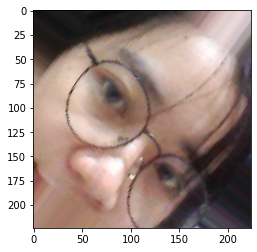

(1, 224, 224, 3)


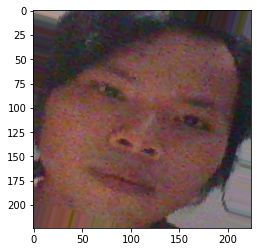

(1, 224, 224, 3)


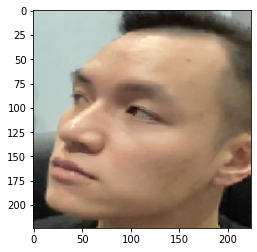

(1, 224, 224, 3)


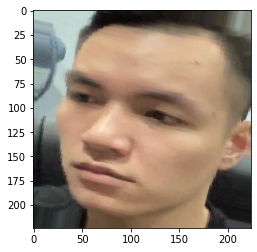

(1, 224, 224, 3)


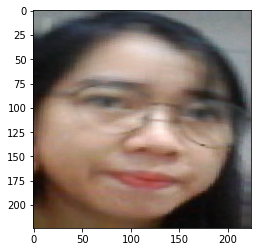

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # shear_range=0.1,
        # zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator_test = datagen.flow_from_directory(
                        TRAIN_DIR,
                        target_size=(IMG_SIZE, IMG_SIZE), # check required input shape
                        batch_size=1,
                        shuffle=True,           # default
                        class_mode=CLASS_MODE)

for _ in range(5):
    img, label = train_generator_test.next()
    img = img/255.
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(1, 224, 224, 3)


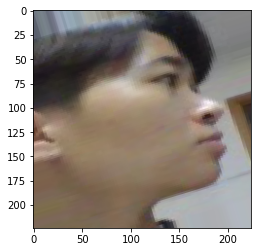

(1, 224, 224, 3)


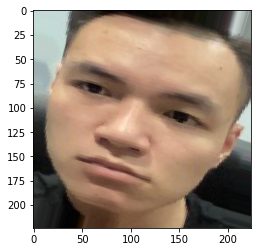

(1, 224, 224, 3)


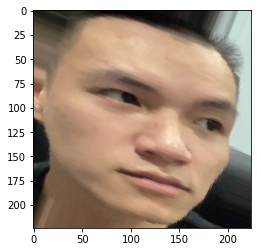

(1, 224, 224, 3)


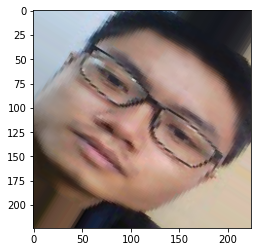

(1, 224, 224, 3)


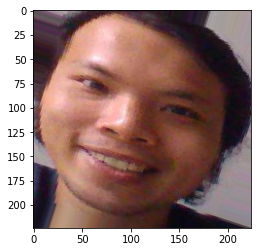

In [ ]:
for _ in range(5):
    img, label = train_generator_test.next()
    img = img/255.
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### BUILD A MODEL

In [ ]:
base_model = tf.keras.applications.ResNet50V2(
                          weights="imagenet",
                          input_shape=(IMG_SIZE, IMG_SIZE, 3), 
                          include_top=False)

base_model.trainable=False

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
from keras.applications.resnet_v2 import preprocess_input

def model_maker():
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(DROPOUT)(x)
    x = keras.layers.Dense(2048, activation = "relu")(x)
    x = keras.layers.Dropout(DROPOUT)(x)
    x = keras.layers.Dense(512, activation = "relu")(x)
    x = keras.layers.Dropout(DROPOUT)(x)
    outputs = keras.layers.Dense(5, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

In [ ]:
model = model_maker()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [ ]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)
model.compile(optimizer=OPTIMIZER,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Config

PATIENCE=5
MIN_LR=1e-7
FACTOR=0.2
VERBOSE = 2

In [ ]:
model_file_path = Path(RESULT, 'model_resnet50v2_checkpoint.h5')

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

earlystopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE,
    verbose=VERBOSE,
    restore_best_weights=True)

# model_file_path = Path(RESULT, 'model_xception_checkpoint.h5')
checkpoint_callback = ModelCheckpoint(filepath=model_file_path,
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=VERBOSE)

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = PATIENCE,
                                            verbose = VERBOSE,
                                            factor = FACTOR,
                                            min_lr = MIN_LR)

In [ ]:
# START TRAINING
init_epochs = 10

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = init_epochs,
                    callbacks = [earlystopping_callback,learning_rate_reduction,checkpoint_callback])

model.save(SAVED_MODEL)

Epoch 1/10
61/61 [==============================] - ETA: 0s - loss: 1.5574 - accuracy: 0.4446
Epoch 00001: val_loss improved from inf to 0.49752, saving model to /content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results/model_resnet50v2_checkpoint.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


61/61 [==============================] - 33s 367ms/step - loss: 1.5574 - accuracy: 0.4446 - val_loss: 0.4975 - val_accuracy: 0.8866 - lr: 1.0000e-04
Epoch 2/10
61/61 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7470
Epoch 00002: val_loss improved from 0.49752 to 0.25456, saving model to /content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results/model_resnet50v2_checkpoint.h5
61/61 [==============================] - 22s 367ms/step - loss: 0.6937 - accuracy: 0.7470 - val_loss: 0.2546 - val_accuracy: 0.9538 - lr: 1.0000e-04
Epoch 3/10
61/61 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.8105
Epoch 00003: val_loss improved from 0.25456 to 0.18398, saving model to /content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results/model_resnet50v2_checkpoint.h5
61/61 [==============================] - 23s 369ms/step - loss: 0.4938 - accuracy: 0.8105 - val_loss: 0.1840 - val_accuracy: 0.9622 - lr: 1.0000e-04
Epoch 4/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 1s 59ms/step - loss: 0.0231 - accuracy: 0.9916


[0.023142531514167786, 0.9915966391563416]

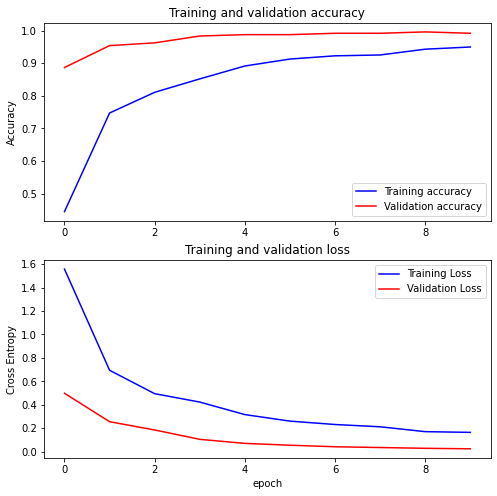

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(8,8))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.subplot(2,1,1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(2,1,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.show()

### FINE TUNE

In [ ]:
# Unfreeze the base_model.
base_model.trainable = True

# Fine-tune from this layer onwards
# NOTE: CHANGE THIS WILL DETERMINE HOW YOU WANT TO FINETUNE RESNET50V2
fine_tune_at = 185

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [ ]:

checkpoint_callback = ModelCheckpoint(filepath=model_file_path,
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=VERBOSE)

earlystopping_callback_tune = EarlyStopping(monitor='val_loss',
                                       patience=PATIENCE,
                                       verbose=VERBOSE,
                                       restore_best_weights=True)

learning_rate_reduction_tune = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = VERBOSE, factor = FACTOR, min_lr = MIN_LR)

init_epochs = 10
fine_tune_epochs = 20
total_epochs = init_epochs + fine_tune_epochs

history_fine = model.fit(train_generator, 
                         validation_data=validation_generator,
                         epochs=total_epochs,
                         initial_epoch=init_epochs,
                         callbacks=[checkpoint_callback, earlystopping_callback_tune, learning_rate_reduction_tune])

model.save(SAVED_MODEL)

Epoch 11/30
61/61 [==============================] - ETA: 0s - loss: 0.1545 - accuracy: 0.9500
Epoch 00011: val_loss improved from inf to 0.01988, saving model to /content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results/model_resnet50v2_checkpoint.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


61/61 [==============================] - 27s 374ms/step - loss: 0.1545 - accuracy: 0.9500 - val_loss: 0.0199 - val_accuracy: 0.9958 - lr: 1.0000e-05
Epoch 12/30
61/61 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.9610
Epoch 00012: val_loss improved from 0.01988 to 0.01871, saving model to /content/gdrive/MyDrive/Colab Notebooks/week9-coderschool/PROJECT/Results/model_resnet50v2_checkpoint.h5
61/61 [==============================] - 23s 372ms/step - loss: 0.1149 - accuracy: 0.9610 - val_loss: 0.0187 - val_accuracy: 0.9958 - lr: 1.0000e-05
Epoch 13/30
61/61 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.9594
Epoch 00013: val_loss did not improve from 0.01871
61/61 [==============================] - 21s 336ms/step - loss: 0.1332 - accuracy: 0.9594 - val_loss: 0.0202 - val_accuracy: 0.9958 - lr: 1.0000e-05
Epoch 14/30
61/61 [==============================] - ETA: 0s - loss: 0.1186 - accuracy: 0.9573
Epoch 00014: val_loss improved from 0.01

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


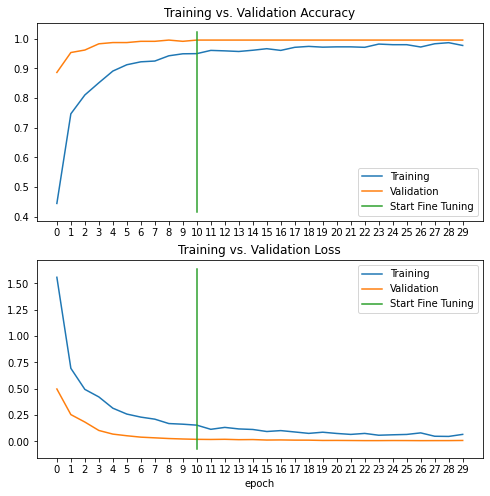

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
################################################
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0.9, 1])
plt.plot([init_epochs,init_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training vs. Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0, 0.5])
plt.plot([init_epochs,init_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training vs. Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 10s 89ms/step - loss: 0.0075 - accuracy: 0.9958


[0.007453746162354946, 0.9957982897758484]

### TRY ERROR ANALYSIS

In [ ]:
print(validation_generator.class_indices)
print(validation_generator.class_indices.keys())

{'Dong': 0, 'Hiep': 1, 'Lili': 2, 'Thao': 3, 'Vy': 4}
dict_keys(['Dong', 'Hiep', 'Lili', 'Thao', 'Vy'])


In [ ]:
# to check the classes in validation set
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
len(validation_generator.classes)

238

In [ ]:
validation_generator.filenames[:10]

['Dong/203322_468403.jpg',
 'Dong/203323_106977.jpg',
 'Dong/203329_921738.jpg',
 'Dong/203343_307003.jpg',
 'Dong/203355_283435.jpg',
 'Dong/203405_298395.jpg',
 'Dong/203410_145552.jpg',
 'Dong/203420_490505.jpg',
 'Dong/203424_634932.jpg',
 'Dong/203433_180064.jpg']

In [ ]:
label_dict = validation_generator.class_indices

In [ ]:
label_dict

{'Dong': 0, 'Hiep': 1, 'Lili': 2, 'Thao': 3, 'Vy': 4}

In [ ]:
# Save label
label_file = open("labels.pkl", "wb")
pickle.dump(label_dict, label_file)
label_file.close()

In [ ]:
# UPLOAD A PHOTO and PREDICT
uploaded = files.upload()
for fn in uploaded.keys():
  print(fn)
  img_path = './' + fn

Saving Screen Shot 2021-11-28 at 23.28.56.png to Screen Shot 2021-11-28 at 23.28.56.png
Screen Shot 2021-11-28 at 23.28.56.png


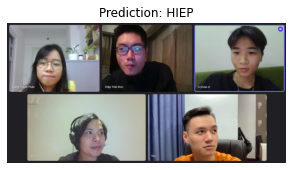

[[4.7272774e-03 9.8528975e-01 8.4955795e-03 6.2779570e-04 8.5967797e-04]]


In [ ]:
img        = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE)) # De resize anh dang can predict ve size ma model dang su dung
img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0) # để biến bức ảnh đang muốn predict thành dạng tensor 4d (1 patch các ảnh 3D)

prediction = model.predict(img_array)

for key, value in validation_generator.class_indices.items():
  if value == prediction[0].argmax():
    pred = key

plt.figure(figsize=(5,5))
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Prediction: ' + pred.upper())
plt.axis('off')
plt.grid(b=None)
plt.show()

print(prediction)